<a href="https://colab.research.google.com/github/tillu1208/OpenCV/blob/main/Tensorflow_OpenCV_DNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow OpenCV DNN Image Classification

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/ude9orvkptlmoyp/AACkTfqT3skx6OzZ8jfQdwvTa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
    !pip install --upgrade opencv-contrib-python
    !pip install tensorflow
else:
    pass

module-code.zip     100%[===================>]  67.64M  30.8MB/s    in 2.2s    
mapname:  conversion of  failed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


In [2]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Read Class File
This will read the class file associated with the Imagenet dataset. It has 1000 objects and their class IDs. We will use this information to decode the predictions obtained from the network.

In [3]:
# Read the ImageNet class names.
with open('input/classification_classes_ILSVRC2012.txt', 'r') as f:
    image_net_names = f.read().split('\n')

# Save the names of all possible classifications, removing empty final line.
class_names = image_net_names[:-1]

# Verify the size, and inspect one of the classes by name.
print(len(class_names), class_names)

1000 ['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel, dipper', 'kite', 'bald eagle, American eagle, Haliaeetus leucocephalus', 'vulture', 'great grey owl, great gray owl, Strix nebulosa', 'European fire salamander, Salamandra salamandra', 'common newt, Triturus vulgaris', 'eft', 'spotted salamander, Ambystoma maculatum', 'axolotl, mud puppy, Ambystoma mexicanum', 'bullfrog, Rana catesbeiana', 'tree frog, tree-frog', 'tailed frog, bell t

## 1.2 Load Model

Loads the model using the readNetFromTensorflow function. We will use a Tensorflow model for this example.

In [7]:
# Loading the Classification model.
model_file = 'models/mobilenet.pb'

model = cv2.dnn.readNetFromTensorflow(model=model_file)

Read Image

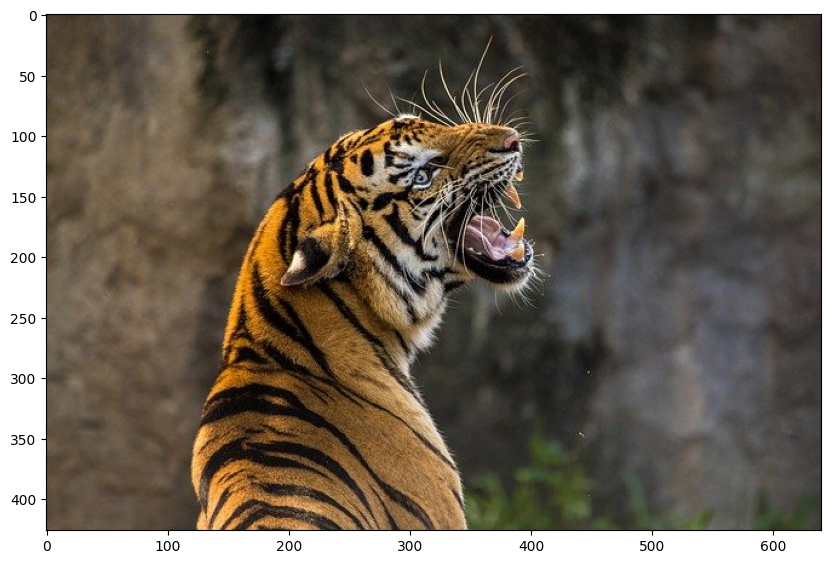

In [8]:
# Load and display the image from disk.
tiger_img = cv2.imread('input/image1.jpg')
plt.figure(figsize=[10, 10])
plt.imshow(tiger_img[:, :, ::-1]);

## 1.3 Read image from blob
 It is used to preprocess images before feeding them into a deep neural network for inference.
Create blob from image by usingcv2.dnn.blobFromImage(img,scalefactor,size,mean,swapRB,crop)

In [10]:
# Create blob from image.
blob = cv2.dnn.blobFromImage(image=tiger_img, scalefactor=1/127.5, size=(224, 224), mean=[127.5, 127.5, 127.5], swapRB=True)


### 1.4 Set the input value
set input to inference by following syntax
*cv2.dnn_Net.setInput( blob[, name[, scalefactor[, mean]]] )*

In [11]:
# Set the input blob for the neural network.
model.setInput(blob)

## Detections using DNN model and forward() and cv2.dnn_Net.forward( [, outputName] )

In [12]:
# Pass the blob forward through the network.
outputs = model.forward()
final_outputs = outputs[0]

In [13]:
# Make all the outputs 1D, where each represents likihood of matching one of the 1K classification groups.
final_outputs = final_outputs.reshape(1000, 1)

# Get the class label index with the max confidence.
label_id = np.argmax(final_outputs)

# Convert score to probabilities for all matches.
probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))

print(probs[:10])
print("Max probability:", np.max(probs))

[[0.00099866]
 [0.00099866]
 [0.00099866]
 [0.00099866]
 [0.00099866]
 [0.00099866]
 [0.00099866]
 [0.00099866]
 [0.00099866]
 [0.00099866]]
Max probability: 0.0019427252


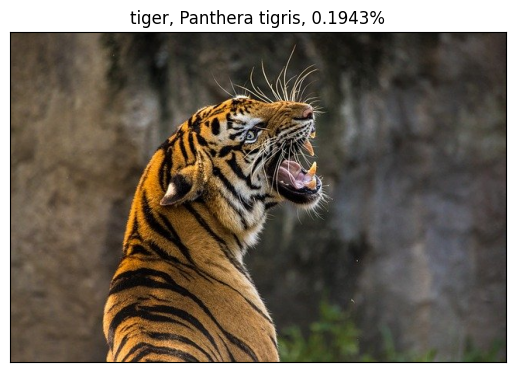

In [15]:
# Get the final highest probability
final_prob = np.max(probs) * 100.0

# Map the max confidence to the class label names.
out_name = class_names[label_id]
out_text = f"{out_name}, {final_prob:.4f}%"

# Display the image, best matched classification, and confidence.
plt.imshow(tiger_img[:, :, ::-1])
plt.title(out_text)
plt.xticks([]), plt.yticks([])
plt.show()